In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc, roc_curve,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import pickle 
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
fp = pd.read_csv("resp_data.csv")
fp

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,18,126,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,10,13,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,2,88,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,38,701,149,165,63,1,5,4,10,3,0,0


In [3]:
fp.shape

(2240, 22)

In [4]:
fp.dtypes

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [5]:
fp.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [6]:
 #check for columns 
fp.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [7]:
#Replace null values
fp["Income"].mean()


52247.25135379061

In [8]:
fp["Income"] = fp["Income"].fillna("52247")

In [9]:
fp.isnull().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

In [10]:
fp.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0


In [11]:
from datetime import datetime

In [12]:
#Change the column Year_birth to Age
yr = datetime.now().year
fp["Age"] = yr-fp["Year_Birth"]

In [13]:
fp.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0,54
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0,63
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0,66
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0,57
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0,35


In [14]:
#Convert Dt_Customer column to Datetime
fp["Dt_Customer"] = pd.to_datetime(fp["Dt_Customer"])

In [15]:
# To generate the hour, minute, days and month columns
fp ["hour"]= fp ["Dt_Customer"].dt.hour
fp ["minute"] = fp ["Dt_Customer"].dt.minute
fp ["day_week"] = fp["Dt_Customer"].dt.dayofweek
fp ["month"] = fp ["Dt_Customer"].dt.month
fp ["year"] = fp ["Dt_Customer"].dt.year
fp ["weekday"] = fp ["Dt_Customer"].dt.dayofweek < 5
fp ["weekend"] = fp ["Dt_Customer"].dt.dayofweek >= 5

In [16]:
fp.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,hour,minute,day_week,month,year,weekday,weekend
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,1,0,54,0,0,0,6,2014,True,False
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,1,0,63,0,0,6,6,2014,False,True
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,66,0,0,1,5,2014,True,False
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,0,1,0,0,0,1,1,0,2,7,0,0,57,0,0,2,11,2014,True,False
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,16,24,11,0,34,2,3,1,2,7,1,0,35,0,0,0,8,2014,True,False


In [17]:
fp.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,hour,minute,day_week,month,year,weekday,weekend
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,1,0,54,0,0,0,6,2014,True,False
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,1,0,63,0,0,6,6,2014,False,True
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,66,0,0,1,5,2014,True,False
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,0,1,0,0,0,1,1,0,2,7,0,0,57,0,0,2,11,2014,True,False
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,16,24,11,0,34,2,3,1,2,7,1,0,35,0,0,0,8,2014,True,False


In [18]:
fp.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool>

In [19]:
#change the Dt_customer column from object 
fp["Dt_Customer"]=pd.to_datetime(fp["Dt_Customer"])
fp.dtypes

Id                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                         object
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Response                        int64
Complain                        int64
Age                             int64
hour                            int32
minute                          int32
day_week                        int32
month       

In [20]:
fp.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,hour,minute,day_week,month,year,weekday,weekend
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,1,0,54,0,0,0,6,2014,True,False
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,1,0,63,0,0,6,6,2014,False,True
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,66,0,0,1,5,2014,True,False
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,0,1,0,0,0,1,1,0,2,7,0,0,57,0,0,2,11,2014,True,False
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,16,24,11,0,34,2,3,1,2,7,1,0,35,0,0,0,8,2014,True,False


#### From the given dataset, calculate and add these new features:
#### 1. TotalSpending: Total spending per customer.
#### 2. NumPurchases: Total number of purchases per customer.
#### 3. APV: Average purchase value per customer.
#### 4. APF: Average purchase frequency per customer.
#### 5. CV: Customer value, calculated as the product of APV and APF.

### 1. TotalSpending: Total spending per customer

In [21]:
# List of columns to sum
columns_to_sum = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

# Calculate total spending per customer
fp["Total_Spending"] = fp[columns_to_sum].sum(axis=1)


#### 2.  NumPurchases: Total number of purchases per customer

In [22]:
#Total number of purchases per customer
fp["NumPurchases"] = fp["NumDealsPurchases"] + fp["NumWebPurchases"] + fp["NumCatalogPurchases"] + fp["NumStorePurchases"]

#### 3.  APV: Average purchase value per customer.

In [23]:
#To calculate Average Purchase Value (APV)
fp["APV"] = round(fp["Total_Spending"]/fp["NumPurchases"],2)

#### 4.  APF: Average purchase frequency per customer

In [24]:
#Subtracting the date in Dt_Customer from december 31, 2014
day_of_customer = (pd.to_datetime('12/31/2014') - pd.to_datetime(fp["Dt_Customer"])).dt.days

In [25]:
fp["APF"] = fp ["NumPurchases"]/ day_of_customer

#### 5.  CV: Customer value, calculated as the product of APV and APF.

In [26]:
fp["CV"] = fp ["APV"] * fp["APF"]
print(fp[["CV"]])

            CV
0     6.009848
1     2.899899
2     1.081983
3     0.196429
4     0.611007
...        ...
2235  1.261905
2236  0.077684
2237  0.301738
2238  1.814961
2239  0.991739

[2240 rows x 1 columns]


### 1. How does the total spending vary across different customer segments or demographics?

<Figure size 1200x600 with 0 Axes>

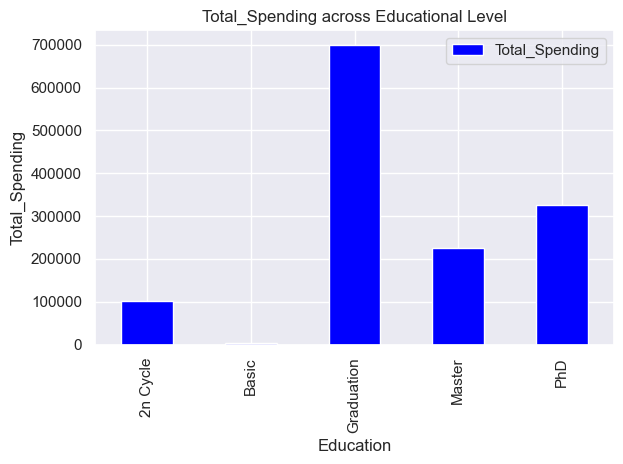

In [27]:
total_spending_by_Education = fp.groupby("Education")["Total_Spending"].sum().to_frame()
plt.figure(figsize=(12, 6))
total_spending_by_Education.plot(kind="bar", color="Blue")
plt.title("Total_Spending across Educational Level")
plt.xlabel("Education")
plt.ylabel("Total_Spending")
plt.tight_layout()
plt.show()

### QUESTION 2. Which channels (web, catalog, store) contribute the most to the total number of purchases

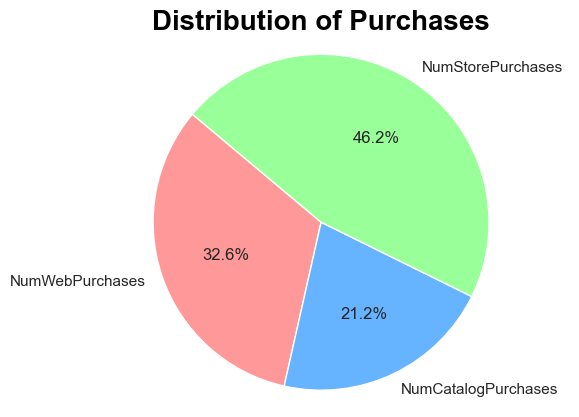

In [28]:

labels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
sizes = [fp["NumWebPurchases"].sum(), fp["NumCatalogPurchases"].sum(), fp["NumStorePurchases"].sum()]

# Define colors for each slice
colors = ['#ff9999', '#66b3ff', '#99ff99']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Purchases', fontsize=20, fontweight="bold", color="black")

plt.axis('equal')
plt.show()


### Question 3. Do certain product categories have higher or lower average purchase values?

In [29]:
average_purchase_value_by_product = fp[["MntWines", "MntFruits", "MntMeatProducts", "MntSweetProducts","MntGoldProds"]].mean()
print(average_purchase_value_by_product)

MntWines            303.935714
MntFruits            26.302232
MntMeatProducts     166.950000
MntSweetProducts     27.062946
MntGoldProds         44.021875
dtype: float64


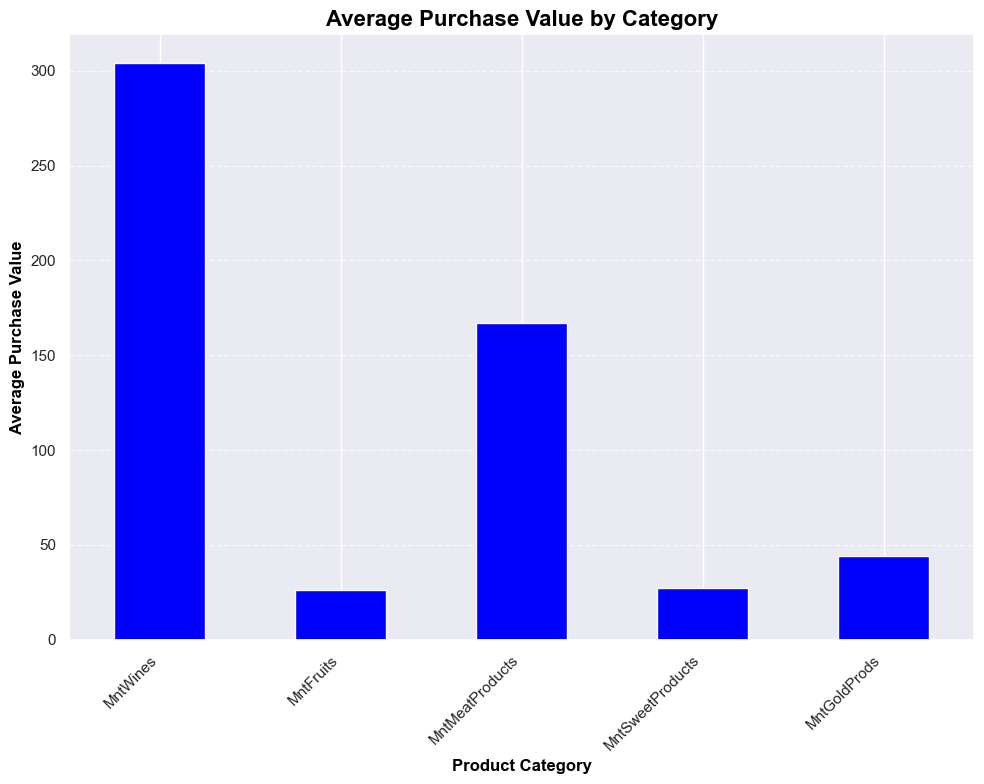

In [30]:
plt.figure(figsize=(10, 8))

# Plot the bar chart with gold color
average_purchase_value_by_product.plot(kind="bar", color="Blue")

plt.title("Average Purchase Value by Category", fontsize=16, fontweight="bold", color="black")
plt.xlabel("Product Category", fontsize=12, fontweight="bold", color="black")
plt.ylabel("Average Purchase Value", fontsize=12, fontweight="bold", color="black")

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


### Question 4. How does average purchase value correlate with customer response to campaign?


<function matplotlib.pyplot.show(close=None, block=None)>

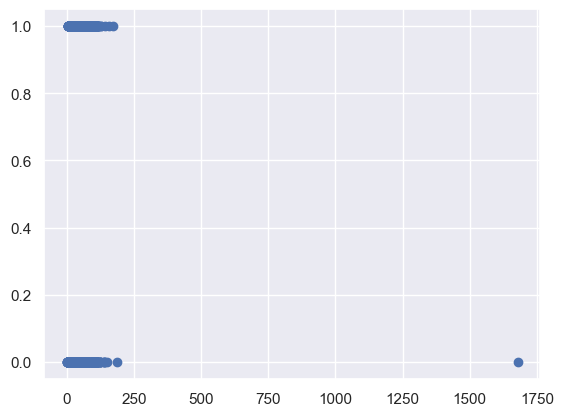

In [31]:

a = fp["APV"]
b = fp["Response"]
plt.scatter(a,b)
plt.show


### Question 5. Are there specific days of the week, month, weekend/weekday, seasons and holiday indicator when purchase frequency increases or decreases?

In [32]:
# Extract dyas of the week
fp["Day_OfWeek"] = fp["Dt_Customer"].dt.day_name()
Purchase_Freq_Byday = fp["Day_OfWeek"].value_counts()
print(Purchase_Freq_Byday)


Day_OfWeek
Sunday       344
Wednesday    334
Thursday     317
Tuesday      315
Monday       313
Friday       313
Saturday     304
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

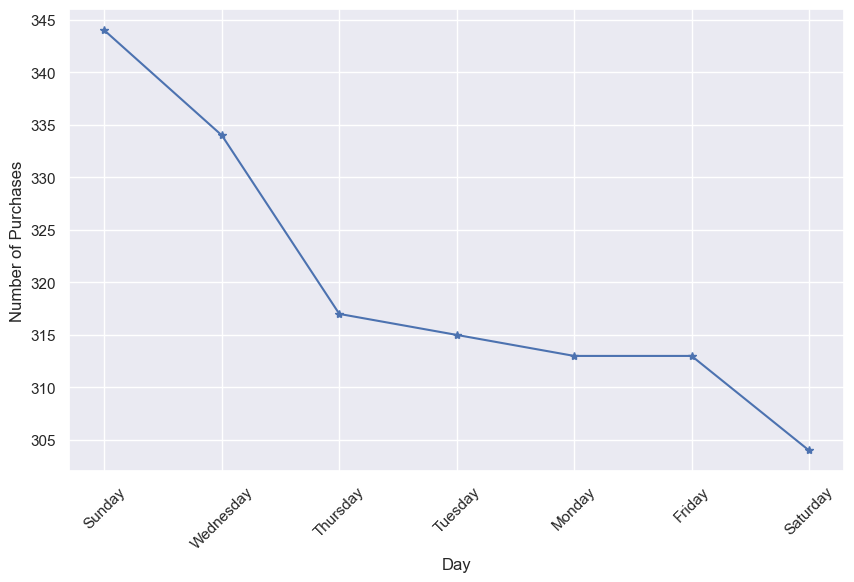

In [33]:
plt.figure(figsize=(10, 6))
Purchase_Freq_Byday.plot(kind='line', marker='*')
plt.title('')
plt.ylabel('Number of Purchases')
plt.grid(True)
plt.xticks(rotation=45)
plt.xlabel('Day')
plt.show

In [34]:
fp["Month"] = fp["Dt_Customer"].dt.month_name()
Purchase_Freq_Bymonth = fp["Month"].value_counts()
print(Purchase_Freq_Bymonth)


Month
August       211
October      209
March        202
December     202
May          192
January      191
February     187
November     185
April        184
June         170
September    166
July         141
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

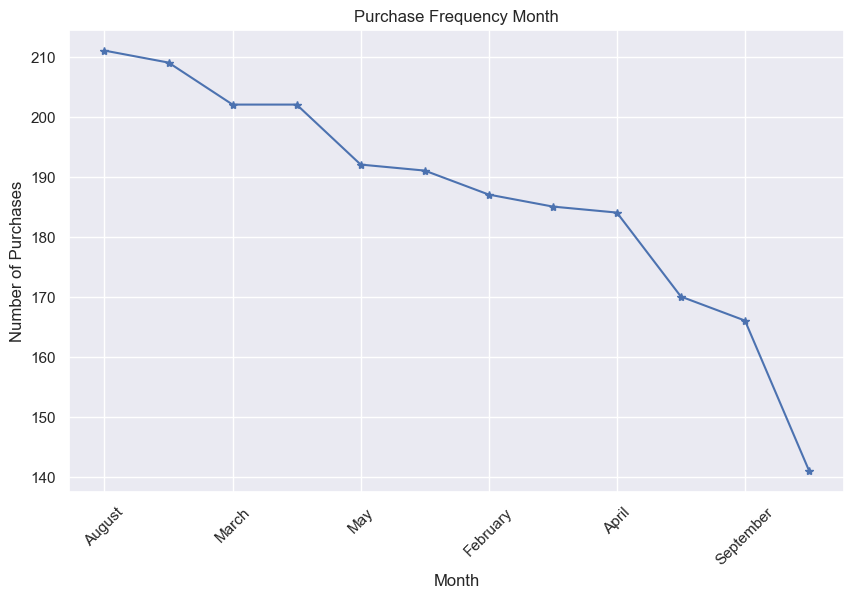

In [35]:
plt.figure(figsize=(10, 6))
Purchase_Freq_Bymonth.plot(kind='line', marker='*')
plt.title('Purchase Frequency Month')
plt.ylabel('Number of Purchases')
plt.grid(True)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.show

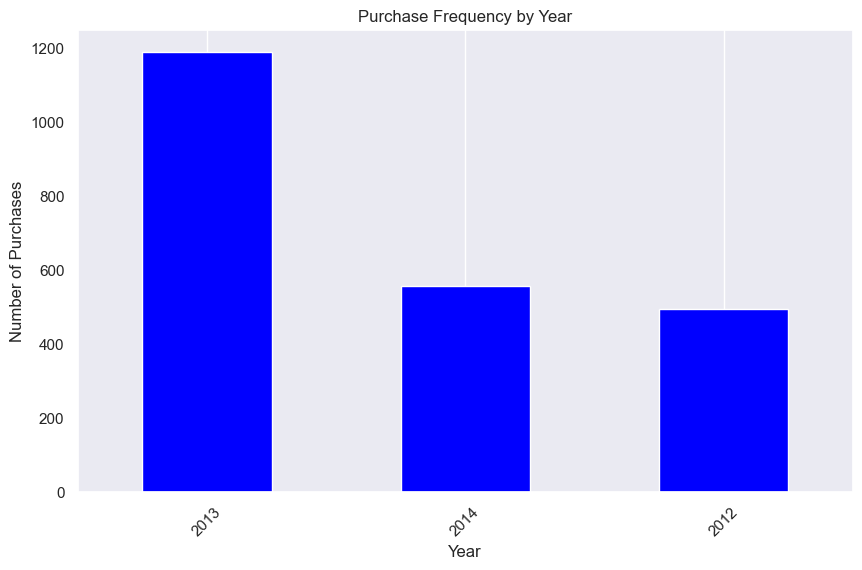

In [36]:
#Extract year and its frequency
year_purchase_freq = fp["Dt_Customer"].dt.year.value_counts()

# Plotting
plt.figure(figsize=(10, 6))
year_purchase_freq.plot(kind='bar', color='blue')
plt.title('Purchase Frequency by Year')
plt.xlabel('Year')
plt.ylabel('Number of Purchases')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

### Question 6.Does purchase frequency vary based on customer demographics?

<Figure size 1200x600 with 0 Axes>

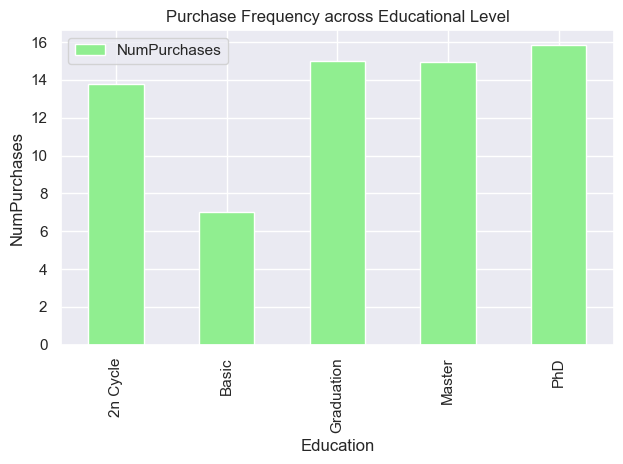

In [37]:

Purchase_Frequency = fp.groupby("Education")["NumPurchases"].mean().to_frame()
plt.figure(figsize=(12, 6))
Purchase_Frequency.plot(kind="bar", color="Lightgreen")
plt.title("Purchase Frequency across Educational Level")
plt.xlabel("Education")
plt.ylabel("NumPurchases")
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

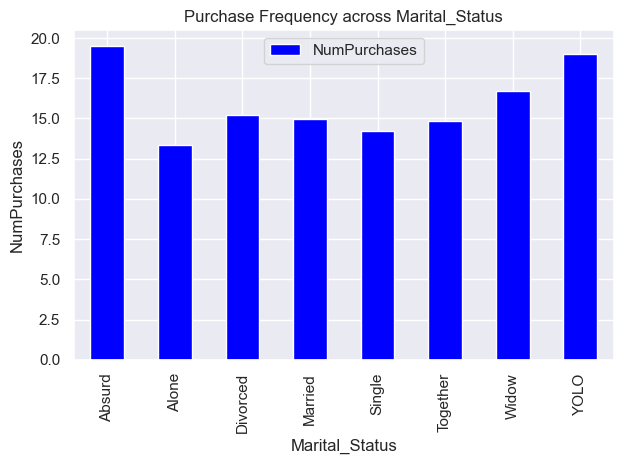

In [38]:
Purchase_Frequency = fp.groupby("Marital_Status")["NumPurchases"].mean().to_frame()
plt.figure(figsize=(12, 6))
Purchase_Frequency.plot(kind="bar", color="Blue")
plt.title("Purchase Frequency across Marital_Status")
plt.xlabel("Marital_Status")
plt.ylabel("NumPurchases")
plt.tight_layout()
plt.show()

### Question No. 7 How can we segment customers based on their CV scores to tailor marketing campaigns or loyalty program

In [39]:
high_value_threshold = fp['CV'].quantile(0.8)
low_value_threshold = fp['CV'].quantile(0.2)

# Segment customers based on CV scores
fp['Segment'] = pd.cut(fp['CV'], bins=[0, low_value_threshold, high_value_threshold, float('inf')], labels=['Low Value', 'Medium Value', 'High Value'])

# Display the segmentation results
print(fp[['Id', 'CV','Segment']])

         Id        CV       Segment
0      1826  6.009848    High Value
1         1  2.899899    High Value
2     10476  1.081983  Medium Value
3      1386  0.196429  Medium Value
4      5371  0.611007  Medium Value
...     ...       ...           ...
2235  10142  1.261905  Medium Value
2236   5263  0.077684     Low Value
2237     22  0.301738  Medium Value
2238    528  1.814961  Medium Value
2239   4070  0.991739  Medium Value

[2240 rows x 3 columns]


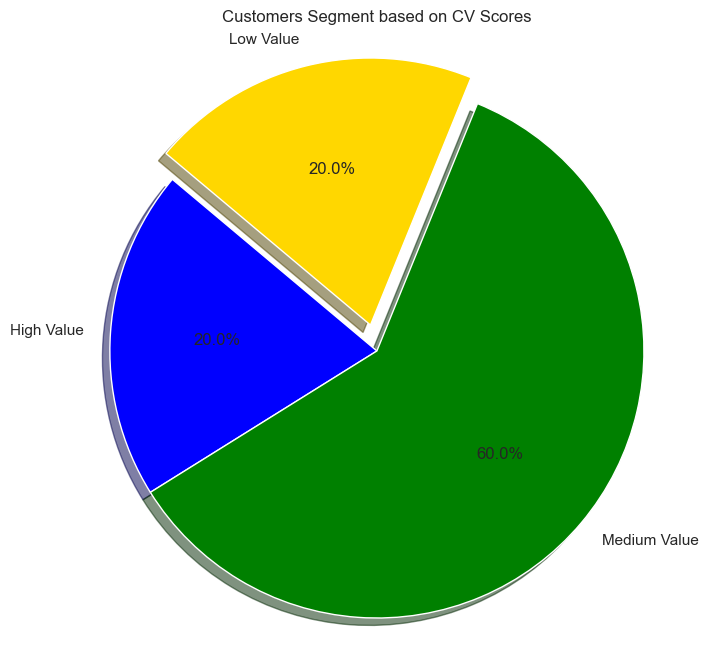

In [40]:
# Data to plot
Segment = 'High Value', 'Medium Value', 'Low Value'
total_Sum = [447, 1341, 448]
colors = ['blue', 'green', 'gold']
explode = (0, 0, 0.1)  # explode 1st slice

# Plot
plt.figure(figsize=(8, 8))
plt.pie(total_Sum, explode=explode, labels=Segment, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Customers Segment based on CV Scores')
plt.show()

### Question 8.What characteristics differentiate high-value customers from low-value ones across the features in your dataset?

In [41]:
hlc = fp[fp['Segment']== 'High Value']
llc = fp[fp['Segment']== 'Low Value']
hlcs = hlc.describe()
llcs = llc.describe()
print(hlcs)
print(llcs)

                 Id   Year_Birth     Kidhome    Teenhome  \
count    447.000000   447.000000  447.000000  447.000000   
mean    5715.988814  1967.749441    0.093960    0.308725   
min        1.000000  1899.000000    0.000000    0.000000   
25%     3033.000000  1958.000000    0.000000    0.000000   
50%     5512.000000  1969.000000    0.000000    0.000000   
75%     8564.500000  1977.000000    0.000000    1.000000   
max    11176.000000  1995.000000    2.000000    2.000000   
std     3150.972295    12.925792    0.314285    0.495260   

                         Dt_Customer     Recency     MntWines   MntFruits  \
count                            447  447.000000   447.000000  447.000000   
mean   2013-12-13 11:32:37.046979840   49.313199   664.402685   58.693512   
min              2012-08-13 00:00:00    0.000000     1.000000    0.000000   
25%              2013-08-10 00:00:00   24.000000   422.000000   19.000000   
50%              2013-12-25 00:00:00   51.000000   626.000000   43.000000 

In [42]:
print(llcs)

                 Id   Year_Birth     Kidhome    Teenhome          Dt_Customer  \
count    448.000000   448.000000  448.000000  448.000000                  448   
mean    5758.660714  1972.895089    0.852679    0.363839  2013-05-21 12:45:00   
min       13.000000  1893.000000    0.000000    0.000000  2012-01-08 00:00:00   
25%     2823.000000  1967.000000    1.000000    0.000000  2013-01-07 00:00:00   
50%     5604.000000  1974.000000    1.000000    0.000000  2013-05-19 12:00:00   
75%     8626.000000  1981.000000    1.000000    1.000000  2013-10-13 00:00:00   
max    11187.000000  1996.000000    2.000000    2.000000  2014-08-05 00:00:00   
std     3292.014828    11.377012    0.459249    0.508747                  NaN   

          Recency    MntWines   MntFruits  MntMeatProducts  MntFishProducts  \
count  448.000000  448.000000  448.000000       448.000000       448.000000   
mean    48.620536   12.020089    3.031250        10.196429         4.767857   
min      0.000000    0.000000    

### Question 9. Are there early indicators in a customer's journey that predict their potential CV and likelihood of becoming a loyal repeat purchaser?


In [43]:
# Count the occurrences of each unique value in the "Response" column, where 1=Yes and 0=No
Response_counts = fp['Response'].value_counts()

# Display the counts
print(Response_counts)


Response
0    1906
1     334
Name: count, dtype: int64


In [44]:
# Count of Yes and No Complains received.
Complain_counts = fp['Complain'].value_counts()
# Display the counts
print(Complain_counts)

Complain
0    2219
1      21
Name: count, dtype: int64


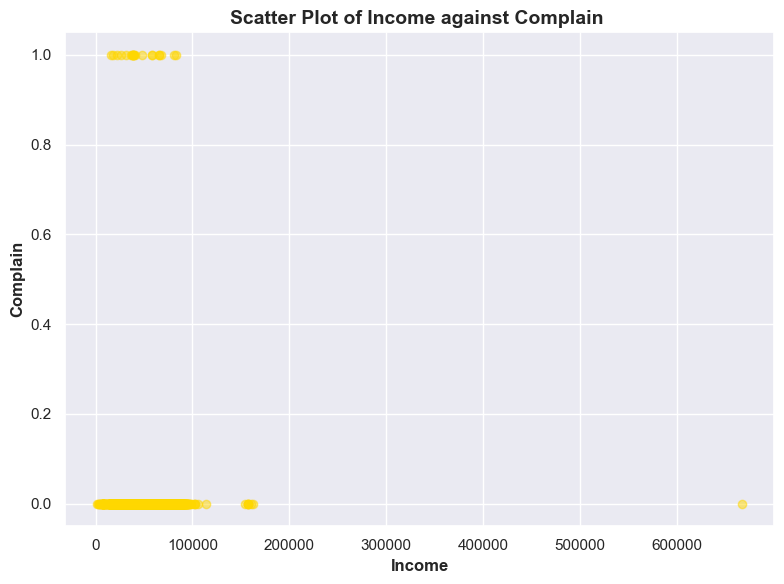

In [45]:
# Customers earning higher salaries majorly made no complain about goods bought.
# Filter rows where "Complain" is 1 or 0
filtered_data = fp[(fp['Complain'] == 1) | (fp['Complain'] == 0)]
# Extracting data for plotting
x = filtered_data['Income']
y = filtered_data['Complain']
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='gold', alpha=0.5)
# Adding labels and title
plt.xlabel('Income', fontsize=12, fontweight='bold')
plt.ylabel('Complain', fontsize=12, fontweight='bold')
plt.title('Scatter Plot of Income against Complain ', fontsize=14, fontweight='bold')
# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()





### Question 10. Are there product bundles that resonate particularly well with high-CV customers?


In [46]:
# Creating two new columns LCV and HCV based on conditions
fp["LCV"] = fp["CV"] < 40
fp["HCV"] = fp["CV"] > 40

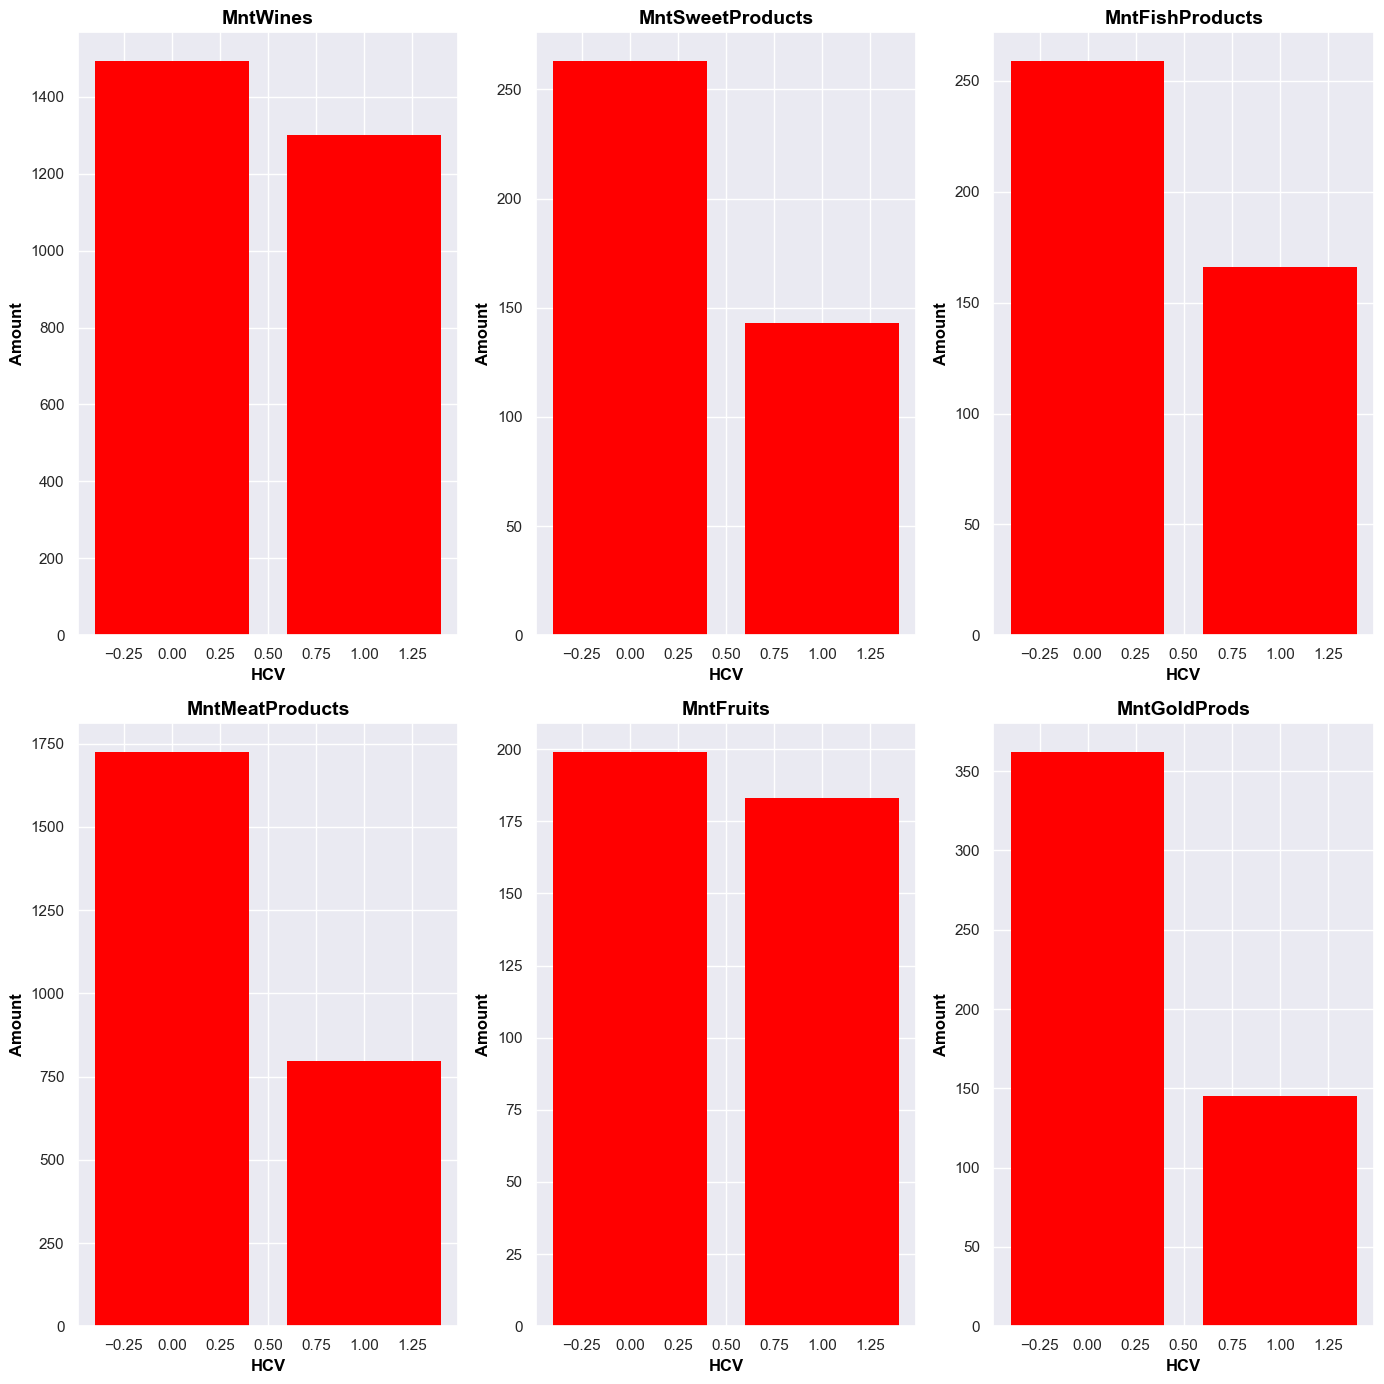

In [47]:
#DataFrame is fp containing columns "HCV", "MntWines", "MntSweetProducts", ..., "MntGoldProds"

# Define x (assuming it represents HCV)
x = fp["HCV"]

# Define y-values for each plot
y1 = fp["MntWines"]
y2 = fp["MntSweetProducts"]
y3 = fp["MntFishProducts"]
y4 = fp["MntMeatProducts"]
y5 = fp["MntFruits"]
y6 = fp["MntGoldProds"]

# Creating subplots with vertical orientation
fig, axs = plt.subplots(2, 3, figsize=(14, 14))

# Plotting MntWines
axs[0, 0].bar(x, y1, color="red", edgecolor="black", linewidth=0)
axs[0, 0].set_title("MntWines", fontsize=14, fontweight="bold", color="black")
axs[0, 0].set_xlabel("HCV", fontsize=12, fontweight="bold", color="black")
axs[0, 0].set_ylabel("Amount", fontsize=12, fontweight="bold", color="black")

# Plotting MntSweetProducts
axs[0, 1].bar(x, y2, color="red", edgecolor="black", linewidth=0)
axs[0, 1].set_title("MntSweetProducts", fontsize=14, fontweight="bold", color="black")
axs[0, 1].set_xlabel("HCV", fontsize=12, fontweight="bold", color="black")
axs[0, 1].set_ylabel("Amount", fontsize=12, fontweight="bold", color="black")

# Plotting MntFishProducts
axs[0, 2].bar(x, y3, color="red", edgecolor="black", linewidth=0)
axs[0, 2].set_title("MntFishProducts", fontsize=14, fontweight="bold", color="black")
axs[0, 2].set_xlabel("HCV", fontsize=12, fontweight="bold", color="black")
axs[0, 2].set_ylabel("Amount", fontsize=12, fontweight="bold", color="black")

# Plotting MntMeatProducts
axs[1, 0].bar(x, y4, color="red", edgecolor="black", linewidth=0)
axs[1, 0].set_title("MntMeatProducts", fontsize=14, fontweight="bold", color="black")
axs[1, 0].set_xlabel("HCV", fontsize=12, fontweight="bold", color="black")
axs[1, 0].set_ylabel("Amount", fontsize=12, fontweight="bold", color="black")

# Plotting MntFruits
axs[1, 1].bar(x, y5, color="red", edgecolor="black", linewidth=0)
axs[1, 1].set_title("MntFruits", fontsize=14, fontweight="bold", color="black")
axs[1, 1].set_xlabel("HCV", fontsize=12, fontweight="bold", color="black")
axs[1, 1].set_ylabel("Amount", fontsize=12, fontweight="bold", color="black")

# Plotting MntGoldProds
axs[1, 2].bar(x, y6, color="red", edgecolor="black", linewidth=0)
axs[1, 2].set_title("MntGoldProds", fontsize=14, fontweight="bold", color="black")
axs[1, 2].set_xlabel("HCV", fontsize=12, fontweight="bold", color="black")
axs[1, 2].set_ylabel("Amount", fontsize=12, fontweight="bold", color="black")

plt.tight_layout()
plt.show()